1.Make dir

In [1]:
import tensorflow as tf
import os

2023-12-25 16:50:41.070681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.config.experimental.list_physical_devices('GPU')

2023-12-25 16:50:46.615286: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-25 16:50:46.721968: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-25 16:50:46.722057: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-25 16:50:46.722087: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1990] Ignoring visible gpu device (device: 0, name: Radeon RX 560 Series, pci bus id: 0000:01:00.0) with AMDGPU version : gfx803. The supported AMDGPU versions are gfx1030, gfx900, gfx906, gfx908, gfx90a.


[]

In [3]:
!mkdir -p {os.path.join('scratch','image_classification','logs')}

2.Remove Doggy Image

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'dataset'
img_exts = ['jpeg','jpg','png','bmp','svg']
data_dir

'dataset'

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

3.Load Data

In [7]:
tf.data.Dataset??

In [8]:
import numpy
import matplotlib.pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 176 files belonging to 2 classes.


2023-12-25 16:50:48.909349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-25 16:50:48.962063: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:48.968635: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:48.997972: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:49.000422: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:49.006048: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:49.007600: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023

In [10]:
data_iterator = data.as_numpy_iterator()

2023-12-25 16:50:49.057410: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:49.058918: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [11]:
batch = data_iterator.next()

2023-12-25 16:50:49.142553: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:49.161482: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:49.476670: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.
2023-12-25 16:50:49.487361: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


In [12]:
batch[0].shape

(32, 256, 256, 3)

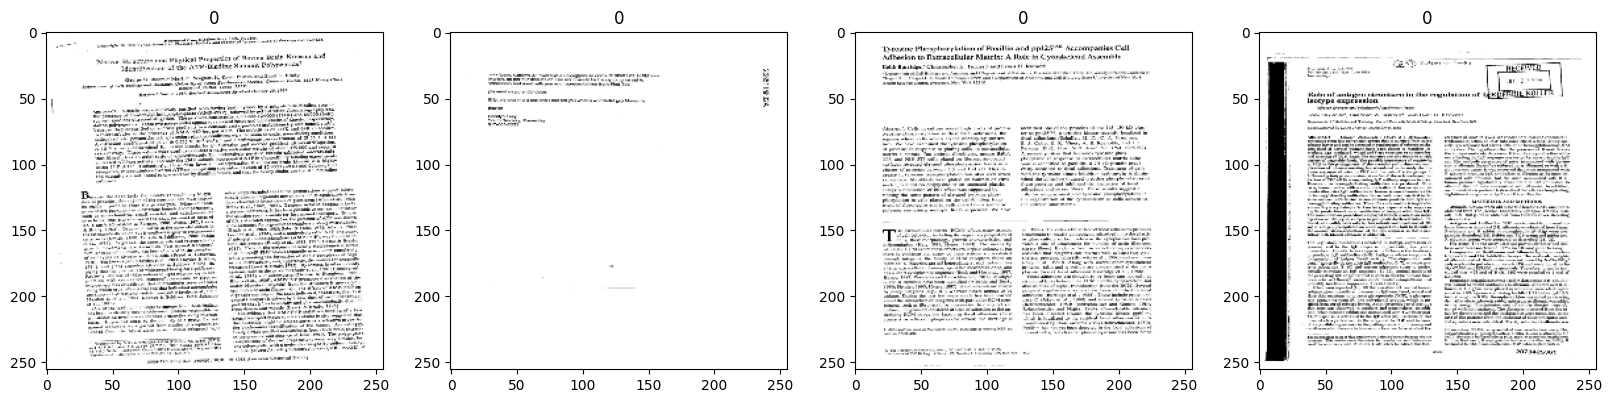

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4.Scale Data

In [14]:
data = data.map(lambda x,y: (x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-12-25 16:50:50.671928: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [15]:
batch = data.as_numpy_iterator().next()

2023-12-25 16:50:50.691851: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:50.702181: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:51.020923: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.
2023-12-25 16:50:51.028998: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.
2023-12-25 16:50:51.048846: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


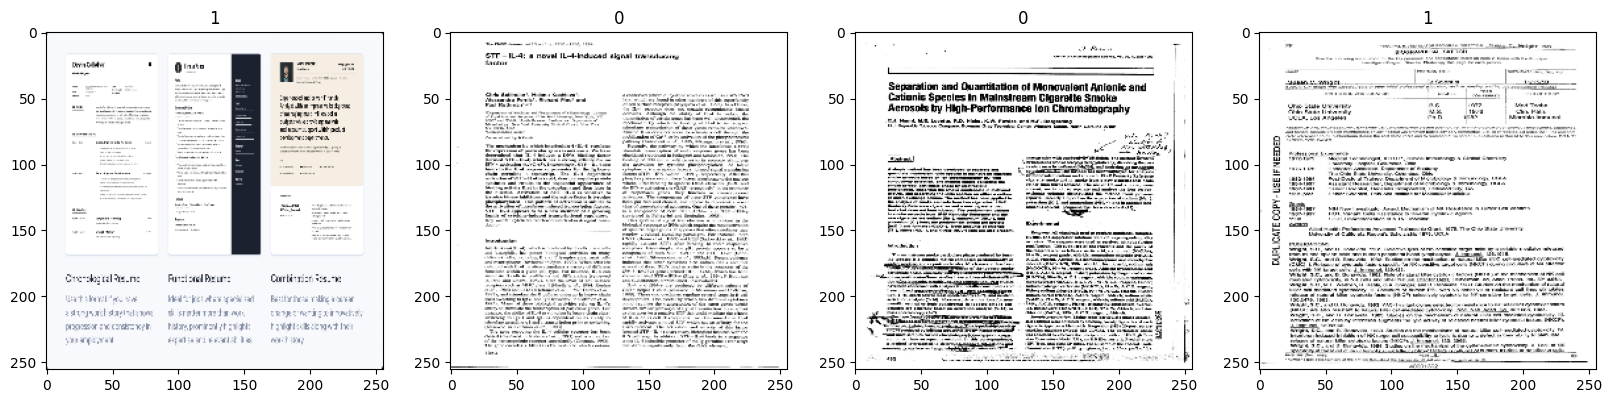

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

5.Spilt Data

In [17]:
len(data)*.7

2023-12-25 16:50:52.047875: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4.199999999999999

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

2023-12-25 16:50:52.072107: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.076102: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


6.Train

In [20]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [22]:
model = Sequential()

2023-12-25 16:50:52.115059: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.117850: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2023-12-25 16:50:52.282354: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.287123: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.290590: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.292436: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.295659: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.298369: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.300061: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.301142: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.303325: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

2023-12-25 16:50:52.404621: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.405925: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [26]:
logsdir = os.path.join('scratch','image_classification','logs')

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logsdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

2023-12-25 16:50:52.500230: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.505067: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.506494: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.508948: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.519780: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.523155: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 1/20


2023-12-25 16:50:52.532103: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.533907: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.537077: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.541389: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.560606: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:52.570564: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:53.840607: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:53.883790: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1/4 [======>.......................] - ETA: 9s - loss: 0.6527 - accuracy: 0.6875

2023-12-25 16:50:55.796506: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 3.0813 - accuracy: 0.5312

2023-12-25 16:50:59.608997: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:59.610568: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:59.611724: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:59.641381: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:59.646730: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:59.652543: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:59.785745: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:50:59.799753: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 8s 2s/step - loss: 3.0813 - accuracy: 0.5312 - val_loss: 1.5716 - val_accuracy: 0.4375


2023-12-25 16:51:00.609509: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:00.625876: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Epoch 2/20


2023-12-25 16:51:04.142556: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.9334 - accuracy: 0.4844

2023-12-25 16:51:09.136248: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:09.150347: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:09.164923: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.9334 - accuracy: 0.4844 - val_loss: 0.7627 - val_accuracy: 0.5312
Epoch 3/20


2023-12-25 16:51:09.740805: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:09.768060: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.6790 - accuracy: 0.6328

2023-12-25 16:51:14.526650: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:14.537426: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:14.547546: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 5s 1s/step - loss: 0.6790 - accuracy: 0.6328 - val_loss: 0.7132 - val_accuracy: 0.5000
Epoch 4/20


2023-12-25 16:51:15.140614: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:15.154854: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.6337 - accuracy: 0.6953

2023-12-25 16:51:20.252572: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:20.264612: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:20.275081: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.6337 - accuracy: 0.6953 - val_loss: 0.7585 - val_accuracy: 0.4688
Epoch 5/20


2023-12-25 16:51:20.880721: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:20.896588: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.6390 - accuracy: 0.6562

2023-12-25 16:51:26.004058: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:26.014943: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:26.032869: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.6390 - accuracy: 0.6562 - val_loss: 0.6741 - val_accuracy: 0.6250
Epoch 6/20


2023-12-25 16:51:26.750736: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:26.764935: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.6434 - accuracy: 0.6250

2023-12-25 16:51:31.924003: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:31.935773: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:31.950438: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.6434 - accuracy: 0.6250 - val_loss: 0.5709 - val_accuracy: 0.6562
Epoch 7/20


2023-12-25 16:51:32.509585: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:32.537025: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.7344

2023-12-25 16:51:37.372367: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:37.383040: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:37.396942: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 5s 1s/step - loss: 0.5627 - accuracy: 0.7344 - val_loss: 0.5722 - val_accuracy: 0.7188
Epoch 8/20


2023-12-25 16:51:38.002030: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:38.026502: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.5027 - accuracy: 0.8047

2023-12-25 16:51:42.829786: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:42.835865: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:42.846816: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 5s 1s/step - loss: 0.5027 - accuracy: 0.8047 - val_loss: 0.4054 - val_accuracy: 0.8750
Epoch 9/20


2023-12-25 16:51:43.431301: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:43.457877: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.4638 - accuracy: 0.7656

2023-12-25 16:51:48.571786: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:48.587299: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:48.602259: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.4638 - accuracy: 0.7656 - val_loss: 0.4439 - val_accuracy: 0.7500
Epoch 10/20


2023-12-25 16:51:49.272961: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:49.299710: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.7656

2023-12-25 16:51:54.469830: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:54.476407: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:54.489018: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.4386 - accuracy: 0.7656 - val_loss: 0.3837 - val_accuracy: 0.8750
Epoch 11/20


2023-12-25 16:51:55.067225: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:51:55.092418: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.3958 - accuracy: 0.8516

2023-12-25 16:52:00.070117: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:00.075097: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:00.085151: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.3958 - accuracy: 0.8516 - val_loss: 0.5253 - val_accuracy: 0.7188
Epoch 12/20


2023-12-25 16:52:00.669692: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:00.704055: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.7734

2023-12-25 16:52:05.561193: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:05.566560: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:05.576564: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 5s 1s/step - loss: 0.4472 - accuracy: 0.7734 - val_loss: 0.3629 - val_accuracy: 0.8438
Epoch 13/20


2023-12-25 16:52:06.199309: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:06.229899: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.4327 - accuracy: 0.8438

2023-12-25 16:52:11.011929: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:11.017858: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:11.026428: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 5s 1s/step - loss: 0.4327 - accuracy: 0.8438 - val_loss: 0.3191 - val_accuracy: 0.9062
Epoch 14/20


2023-12-25 16:52:11.649393: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:11.673168: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.3312 - accuracy: 0.8828

2023-12-25 16:52:16.407025: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:16.426594: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:16.436088: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 5s 1s/step - loss: 0.3312 - accuracy: 0.8828 - val_loss: 0.3874 - val_accuracy: 0.8438
Epoch 15/20


2023-12-25 16:52:17.053240: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:17.079278: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.3052 - accuracy: 0.8438

2023-12-25 16:52:22.142764: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:22.154177: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:22.166034: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.3052 - accuracy: 0.8438 - val_loss: 0.1951 - val_accuracy: 0.9375
Epoch 16/20


2023-12-25 16:52:22.884700: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:22.917665: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.2158 - accuracy: 0.9375

2023-12-25 16:52:28.916306: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:28.923712: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:28.937868: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 7s 2s/step - loss: 0.2158 - accuracy: 0.9375 - val_loss: 0.1583 - val_accuracy: 0.9375
Epoch 17/20


2023-12-25 16:52:29.677813: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:29.704836: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9219

2023-12-25 16:52:35.070596: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:35.081039: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:35.095335: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.2077 - accuracy: 0.9219 - val_loss: 0.1574 - val_accuracy: 0.9062
Epoch 18/20


2023-12-25 16:52:35.694669: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:35.720529: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.2114 - accuracy: 0.9141

2023-12-25 16:52:40.820407: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:40.829693: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:40.856286: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 6s 1s/step - loss: 0.2114 - accuracy: 0.9141 - val_loss: 0.1395 - val_accuracy: 0.9375
Epoch 19/20


2023-12-25 16:52:41.468422: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:41.492241: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.1633 - accuracy: 0.9219

2023-12-25 16:52:46.308695: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:46.313781: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:46.322660: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 5s 1s/step - loss: 0.1633 - accuracy: 0.9219 - val_loss: 0.2120 - val_accuracy: 0.9062
Epoch 20/20


2023-12-25 16:52:46.897529: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:46.931065: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - ETA: 0s - loss: 0.1341 - accuracy: 0.9609

2023-12-25 16:52:51.622238: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:51.634596: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:51.643185: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


4/4 [==============================] - 5s 1s/step - loss: 0.1341 - accuracy: 0.9609 - val_loss: 0.0773 - val_accuracy: 0.9688


2023-12-25 16:52:52.216812: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


7.Plot Performance

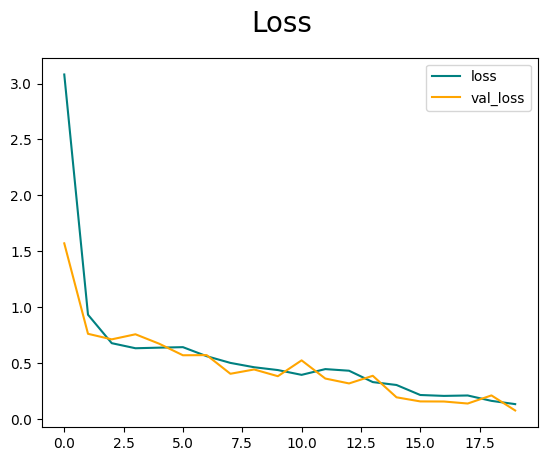

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize='20')
plt.legend(loc='upper right')
plt.show()

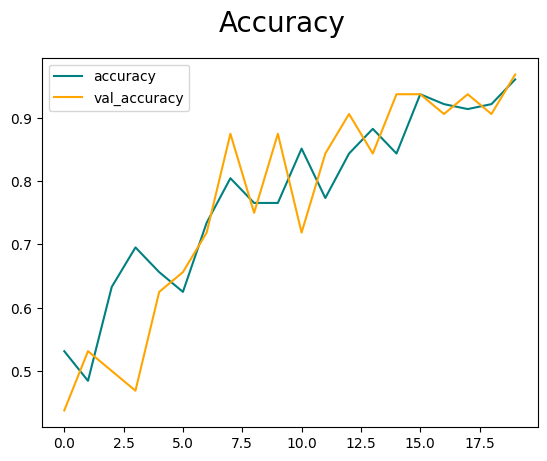

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize='20')
plt.legend(loc='upper left')
plt.show()

8.Evaluate Model

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in val.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-12-25 16:52:52.958907: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:52.968309: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.285449: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.290325: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.315080: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.318763: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.340769: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.343186: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.345743: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53

1/1 [==============================] - 0s 369ms/step


2023-12-25 16:52:53.763171: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.768662: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.770099: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.771937: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.773244: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.776330: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.790416: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.791293: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.793139: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53

In [34]:
print(f'Precision:{pre.result()}, Recall:{re.result()}, Accuracy:{acc.result()}')

Precision:0.9230769276618958, Recall:1.0, Accuracy:0.96875


2023-12-25 16:52:53.840039: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:52:53.843257: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [ ]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('yhat',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

9.Test

In [35]:
import cv2
import numpy as np

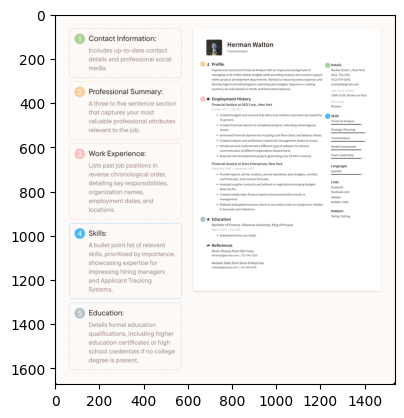

In [39]:
img = cv2.imread('dataset/non_resume/')
plt.imshow(img)
plt.show()

2023-12-25 16:58:56.218587: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:58:56.223623: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:58:56.226268: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:58:56.228732: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


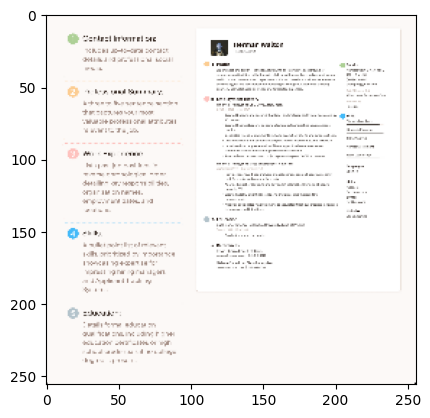

In [40]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

2023-12-25 16:59:00.954716: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:00.977280: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:00.979537: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:01.025611: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:01.032100: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:01.034999: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:01.038732: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:01.049866: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:01.055390: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:01

1/1 [==============================] - 0s 153ms/step


2023-12-25 16:59:01.190063: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [43]:
if yhat > 0.5: 
    print(f'Predicted class is resume')
else:
    print(f'Predicted class is non resume')

Predicted class is resume


In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save('resume_classifier.h5')

2023-12-25 16:59:48.358905: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:48.360297: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:48.369202: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:48.371025: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:48.373783: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:48.376463: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:48.380189: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-25 16:59:48.449899: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [ ]:
break

Segmentation

In [ ]:
import cv2
import numpy as np
import os
import uuid

import matplotlib.pyplot as plt

from skimage.feature import canny

import scipy.ndimage as nd

from skimage.filters import sobel
from skimage.segmentation import watershed

In [ ]:
!mkdir -p {os.path.join('scratch','image_classification','data','output')}

In [ ]:
file_list = os.listdir(r'/home/zok/joker/scratch/image_classification/data/input')

In [ ]:
IMAGES_PATH = os.listdir(r'/home/zok/joker/scratch/image_classification/data/output')

In [ ]:
IMAGES_PATH

In [ ]:
def edge_to_image(edges):
	ls = []
	for i in range(edges.shape[0]):
		ls.append([0])
		for j in range(edges.shape[1]):
			filters = 255 if edges[i][j] else 0
			ls[i].append(filters)
	return np.matrix(ls, dtype=np.float32)

In [ ]:
def k_means_(img):
    Z = img.reshape((-1, 1))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    K = 3
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    imgname = os.path.join('/home/zok/joker/scratch/image_classification/data/output',f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, res2)
    # cv2.imshow('Clustering: K-Means Segmentation', res2)
    # cv2.waitKey(0)   

In [ ]:
def image_segmentation(img_name,dir_path=r'/home/zok/joker/scratch/image_classification/data/input'):
    image_path = f'{dir_path}/{img_name}'
    image1 = cv2.imread(image_path)
    img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

    ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY +
                                 cv2.THRESH_OTSU)
    # cv2.imshow('Threshold: Otsu+binary', thresh1)
    imgname = os.path.join('/home/zok/joker/scratch/image_classification/data/output',f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, thresh1)
    # cv2.waitKey(0)

    thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 199, 5)
    # cv2.imshow('Threshold: adaptive', thresh2)
    imgname = os.path.join('/home/zok/joker/scratch/image_classification/data/output',f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, thresh2)
    # cv2.waitKey(0)
    
    edges = canny(img)
    
    edge_image = edge_to_image(edges)
    
    # cv2.imshow('Edge: Edge detector',edge_image)
    # cv2.waitKey(0)
 
    fill_im = nd.binary_fill_holes(edges)
    fill_image = edge_to_image(fill_im)
    imgname = os.path.join('/home/zok/joker/scratch/image_classification/data/output',f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, fill_image)
    # cv2.imshow('Region: Region Filling', fill_image)
    # cv2.waitKey(0)

    elevation_map = sobel(img)
    
    fill_image = elevation_map*10
    # imgname = os.path.join('/home/zok/joker/scratch/image_classification/data/output',f'{str(uuid.uuid1())}.jpg')
    # cv2.imwrite(imgname, fill_image)
    # cv2.imshow('Watershed: Elevation Map', fill_image)

    markers = np.zeros_like(img)
    
    markers[img < 80] = 1
    markers[img > 150] = 10

    segmentation = watershed(elevation_map, markers)    
    # imgname = os.path.join('/home/zok/joker/scratch/image_classification/data/output',f'{str(uuid.uuid1())}.jpg')
    # cv2.imwrite(imgname, segmentation)
    # cv2.imshow('Watershed: Watershed segmentation', np.matrix(segmentation/10, dtype = np.float32))
    # cv2.waitKey(0)

    k_means_(img)
    
    cv2.destroyAllWindows()

In [ ]:
for file_name in file_list:
    if file_name:
        image_segmentation(file_name)
    else:
        continue